In [9]:
# LightGBM to predict responder6

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset from Parquet
data_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/data/cleaned/day0_data_cleaned.parquet"
day0_data_cleaned = pd.read_parquet(data_path)

# Define features (X) and target (y)
X = day0_data_cleaned.drop(columns=["responder_6"])  # Drop the target column
y = day0_data_cleaned["responder_6"]  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to confirm
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (1555368, 56)
Testing Features Shape: (388842, 56)
Training Target Shape: (1555368,)
Testing Target Shape: (388842,)


In [11]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize the LightGBM model
lgb_model = LGBMRegressor(
    n_estimators=500,  # Number of trees
    learning_rate=0.05,  # Step size
    max_depth=7,  # Depth of each tree
    subsample=0.8,  # Subsample ratio
    colsample_bytree=0.8,  # Feature selection ratio per tree
    random_state=42,  # Ensures reproducibility
    n_jobs=-1  # Use all available CPU cores
)

print("Starting LightGBM Training...")

# Train the model
lgb_model.fit(X_train, y_train)

print("LightGBM Training Complete!")

Starting LightGBM Training...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706
LightGBM Training Complete!


In [12]:
# Make predictions
y_pred = lgb_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.6821900329839531
Test RMSE: 0.8259479602153837
Test MAE: 0.5423586431878438
Test R²: 0.10170620416475773


In [14]:
# very low performance: the model only explains 10% of the variance

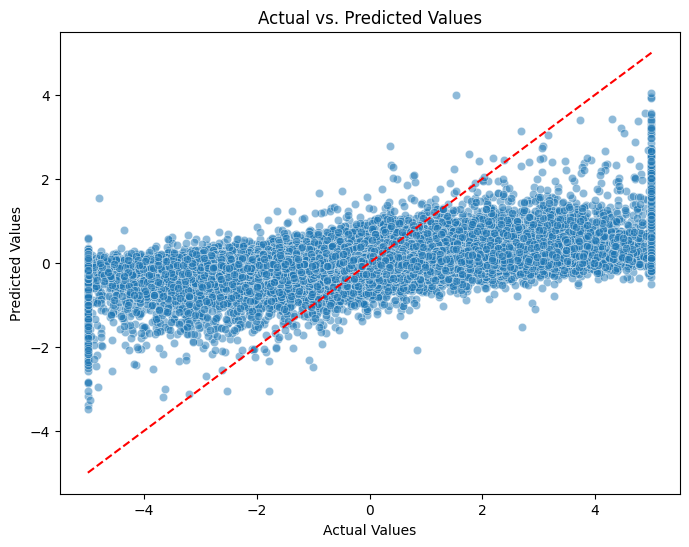

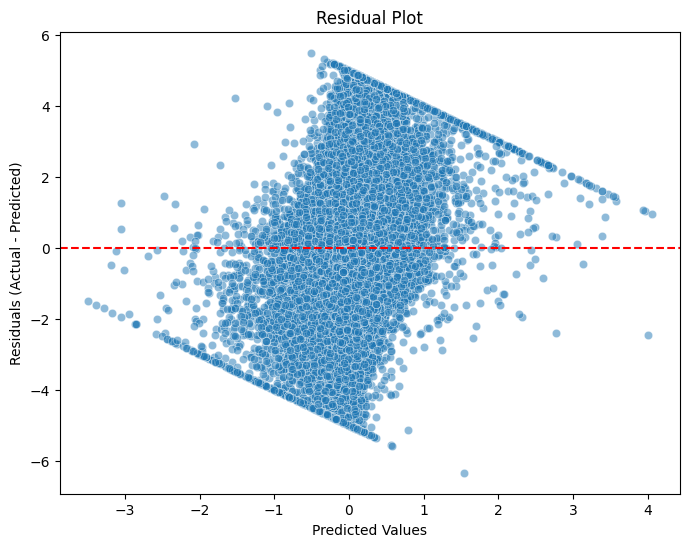

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual Plot: Errors vs. Predicted
residuals = y_test - y_pred  # Calculate residuals

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Ideal zero-error line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np

# Define the model
lgb_model = lgb.LGBMRegressor()

# Define the hyperparameter search space
param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'num_leaves': [20, 31, 40, 50, 70, 100],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': np.linspace(0.5, 1.0, 5)
}

# Randomized search with 3-fold cross-validation
random_search = RandomizedSearchCV(lgb_model, param_grid, n_iter=20, 
                                   cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=2, random_state=42)

# Run the search
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


python(95027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95030) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95031) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95033) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Number of data points in the train set: 1036912, number of used features: 56
[LightGBM] [Info] Number of data points in the train set: 1036912, number of used features: 56
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.633682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.627

python(95584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13142
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706
Best Parameters: {'subsample': 1.0, 'num_leaves': 70, 'n_estimators': 1000, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.3}


In [17]:
# Train the model with best parameters

# Import LightGBM
import lightgbm as lgb

# Train the final model with the best parameters
best_lgb_model = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3
)

# Fit the model
best_lgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13142
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

# Print results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.38105929134527716
Test RMSE: 0.6173000010896462
Test MAE: 0.4317440629861273
Test R²: 0.4982289674277778


In [19]:
# The model now explains ~50% of the variance in the target variable (responder 6)

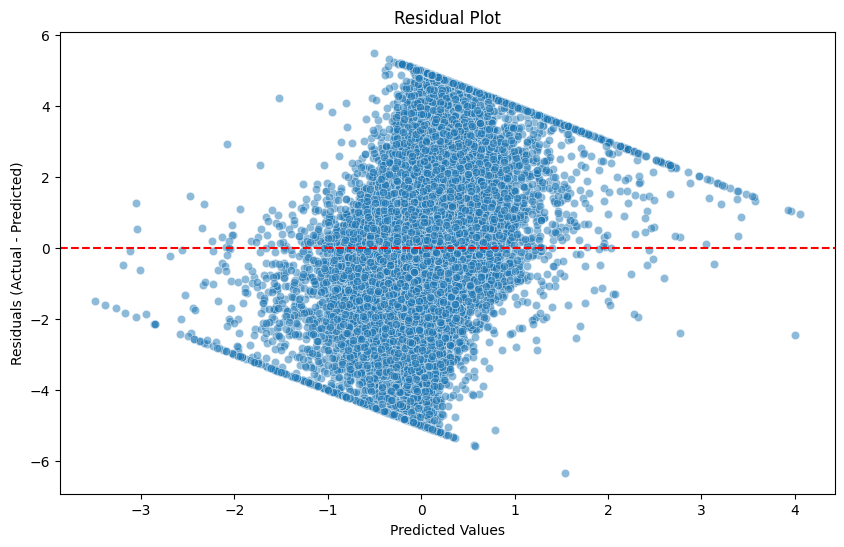

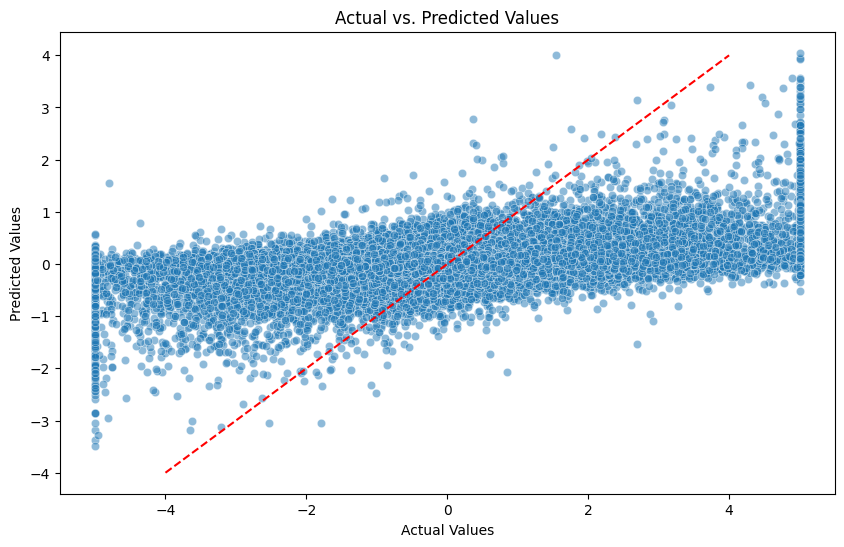

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `y_test` contains the actual values and `y_pred` contains the model's predictions

# Residual Plot (Actual - Predicted)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([-4, 4], [-4, 4], color='r', linestyle="--")  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_92115/2365040748.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance[:20], palette="viridis")


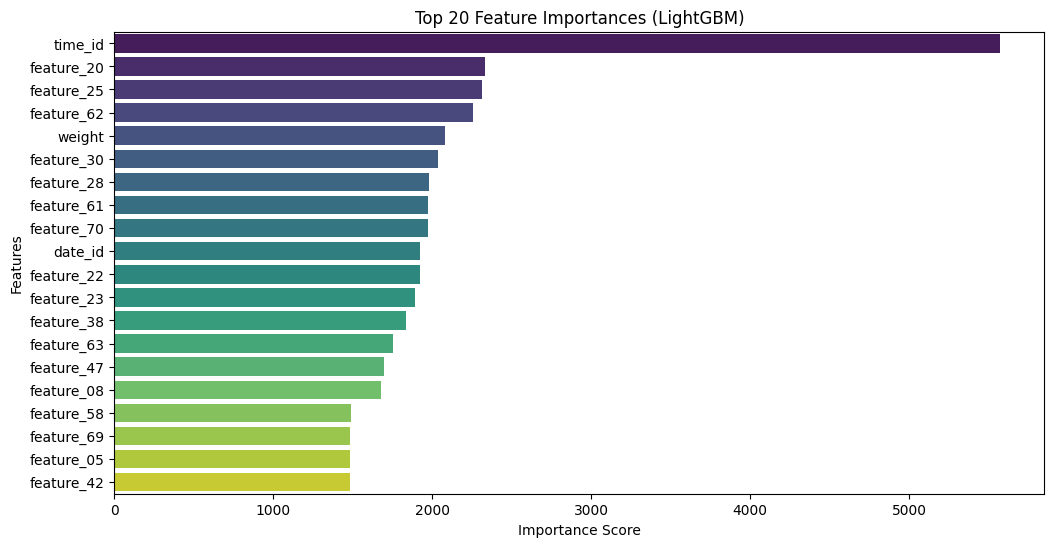

In [21]:
# Feature importance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the trained LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgb_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances (LightGBM)")
plt.show()

/var/folders/61/_nwkfn8n41gcbc7yrsk4kn6m0000gn/T/ipykernel_92115/3345318124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


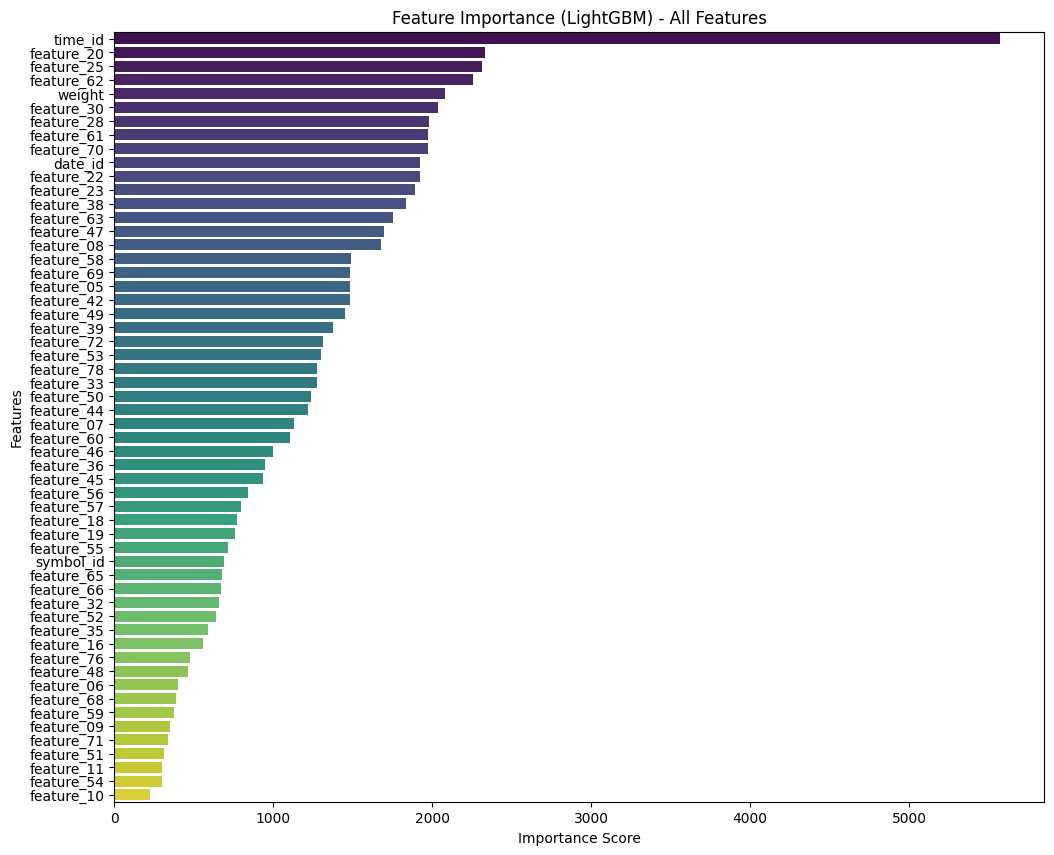

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importances from the LightGBM model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is used for feature names
    'Importance': best_lgb_model.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot all feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (LightGBM) - All Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [40]:
import joblib

# Define the save path
feature_importance_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/feature_importance.pkl"

# Save feature importance list as a pickle file
joblib.dump(feature_importance, feature_importance_path)

print(f"Feature importance list saved successfully at: {feature_importance_path}")

Feature importance list saved successfully at: /Users/caroline/Documents/TUM/Python/MarketForecasting/models/feature_importance.pkl


In [23]:
# Train the model with the 20 most important features

# Select the top 20 most important features
top_20_features = feature_importance.head(20)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top20 = X_train[top_20_features]
X_test_top20 = X_test[top_20_features]

print(f"New Training Shape: {X_train_top20.shape}")
print(f"New Testing Shape: {X_test_top20.shape}")

New Training Shape: (1555368, 20)
New Testing Shape: (388842, 20)


In [24]:
import lightgbm as lgb

# Define the model with best parameters found previously
lgb_model_top20 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train the model on only the top 20 features
lgb_model_top20.fit(X_train_top20, y_train)

# Make predictions
y_pred_top20 = lgb_model_top20.predict(X_test_top20)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4931
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 20
[LightGBM] [Info] Start training from score 0.001706


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_top20)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_top20)
r2 = r2_score(y_test, y_pred_top20)

# Display results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.3538521554800797
Test RMSE: 0.5948547347715067
Test MAE: 0.4166835633998123
Test R²: 0.5340547640071427


In [26]:
# slight improvement of the performance of lgb_model_top20 compared to best_lgb_model (0.49 to 0.53 of R-squared)

In [27]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# **Step 1: Remove Non-Feature Columns**
non_feature_columns = ["time_id", "weight", "date_id", "symbol_id"]  # Add any other non-feature columns

# Keep only 'feature_' columns
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Ensures only 'feature_' columns
X_train_features = X_train[feature_columns]
X_test_features = X_test[feature_columns]

print(f"Shape after keeping only 'feature_' columns - Training: {X_train_features.shape}, Testing: {X_test_features.shape}")

# **Step 2: Align Feature Importance with Available Features**
# Get feature importances from the trained model
trained_feature_names = best_lgb_model.feature_name_  # Extract names from the fitted model
trained_importances = best_lgb_model.feature_importances_

# Ensure we only use importance values for the current dataset's features
feature_importance = pd.DataFrame({
    'Feature': trained_feature_names,
    'Importance': trained_importances
})

# Filter only features that exist in X_train_features
feature_importance = feature_importance[feature_importance["Feature"].isin(X_train_features.columns)]

# Sort features by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# **Step 3: Select the Top 20 Features**
top_20_features = feature_importance.head(20)["Feature"].tolist()

# Subset the training and testing datasets to include only these features
X_train_top20 = X_train_features[top_20_features]
X_test_top20 = X_test_features[top_20_features]

print(f"New Training Shape (Top 20 Features): {X_train_top20.shape}")
print(f"New Testing Shape (Top 20 Features): {X_test_top20.shape}")

# **Step 4: Train the LightGBM Model on the Top 20 Features**
lgb_model_top20 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train with only top 20 selected features
lgb_model_top20.fit(X_train_top20, y_train)

# Make predictions
y_pred_top20 = lgb_model_top20.predict(X_test_top20)

# **Step 5: Compute Evaluation Metrics**
mse_20 = mean_squared_error(y_test, y_pred_top20)
rmse_20 = np.sqrt(mse_20)
mae_20 = mean_absolute_error(y_test, y_pred_top20)
r2_20 = r2_score(y_test, y_pred_top20)

# Display results
print(f"Test MSE: {mse_20}")
print(f"Test RMSE: {rmse_20}")
print(f"Test MAE: {mae_20}")
print(f"Test R²: {r2_20}")

Shape after keeping only 'feature_' columns - Training: (1555368, 52), Testing: (388842, 52)
New Training Shape (Top 20 Features): (1555368, 20)
New Testing Shape (Top 20 Features): (388842, 20)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5016
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 20
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.4157412099212914
Test RMSE: 0.6447799701613655
Test MAE: 0.448435035548443
Test R²: 0.4525605308072307


In [28]:
print(f"Number of Features in X_train: {len(X_train.columns)}")
print(f"Number of Importance Scores: {len(best_lgb_model.feature_importances_)}")

Number of Features in X_train: 56
Number of Importance Scores: 56


In [29]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# **Ensure feature names match between X_train and model**
if len(X_train.columns) == len(best_lgb_model.feature_importances_):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,  # Ensure we use the correct columns
        'Importance': best_lgb_model.feature_importances_
    })
else:
    print("Feature importance length mismatch! Adjusting feature extraction...")
    feature_importance = pd.DataFrame({
        'Feature': X_train.iloc[:, :len(best_lgb_model.feature_importances_)].columns,
        'Importance': best_lgb_model.feature_importances_
    })

# **Sort Features by Importance**
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# **Select Top 30 Features**
top_30_features = feature_importance.head(30)["Feature"].tolist()

# **Subset Training & Testing Data**
X_train_top30 = X_train[top_30_features]
X_test_top30 = X_test[top_30_features]

print(f"New Training Shape: {X_train_top30.shape}")
print(f"New Testing Shape: {X_test_top30.shape}")

# **Train the Model with Top 30 Features**
lgb_model_top30 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

lgb_model_top30.fit(X_train_top30, y_train)

# **Make Predictions**
y_pred_top30 = lgb_model_top30.predict(X_test_top30)

# **Evaluate Performance**
mse = mean_squared_error(y_test, y_pred_top30)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_top30)
r2 = r2_score(y_test, y_pred_top30)

# Display results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

New Training Shape: (1555368, 30)
New Testing Shape: (388842, 30)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7481
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 30
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.3558678996665269
Test RMSE: 0.5965466450048369
Test MAE: 0.41695173735437213
Test R²: 0.5314004735468201


In [30]:
# Test with 40 features

import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# **Ensure we ONLY keep feature columns**
feature_columns = [col for col in X_train.columns if col.startswith("feature")]  # Filters out time_id, weight, etc.

# **Extract feature importance and filter only feature columns**
feature_importance_filtered = feature_importance[feature_importance["Feature"].isin(feature_columns)]

# **Select Top 40 Feature Names**
top_40_features = feature_importance_filtered.head(40)["Feature"].tolist()

# **Subset Training & Testing Data**
X_train_top40 = X_train[top_40_features]
X_test_top40 = X_test[top_40_features]

print(f"New Training Shape: {X_train_top40.shape}")
print(f"New Testing Shape: {X_test_top40.shape}")

# **Train the Model with Top 40 Features**
lgb_model_top40 = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

lgb_model_top40.fit(X_train_top40, y_train)

# **Make Predictions**
y_pred_top40 = lgb_model_top40.predict(X_test_top40)

# **Evaluate Performance**
mse = mean_squared_error(y_test, y_pred_top40)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_top40)
r2 = r2_score(y_test, y_pred_top40)

# Display results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

New Training Shape: (1555368, 40)
New Testing Shape: (388842, 40)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10116
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 40
[LightGBM] [Info] Start training from score 0.001706
Test MSE: 0.4157587284982087
Test RMSE: 0.6447935549446883
Test MAE: 0.4492165427022158
Test R²: 0.4525374627056815


In [31]:
# Decrease in performance when including 40 features instead of 30. 

In [34]:
import joblib
import os

# Define paths
models_dir = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models"
model_path = os.path.join(models_dir, "lgbm_model_top30.pkl")
features_path = os.path.join(models_dir, "top30_features.pkl")

# Ensure the models directory exists
os.makedirs(models_dir, exist_ok=True)

# Save the trained LightGBM model
joblib.dump(lgb_model_top30, model_path)
print(f"Model saved successfully at: {model_path}")

# Save the selected 30 features for future reference
joblib.dump(top_30_features, features_path)
print(f"Selected feature list saved at: {features_path}")

Model saved successfully at: /Users/caroline/Documents/TUM/Python/MarketForecasting/models/lgbm_model_top30.pkl
Selected feature list saved at: /Users/caroline/Documents/TUM/Python/MarketForecasting/models/top30_features.pkl


In [36]:
import joblib

# Load the saved top 30 features list
features_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/top30_features.pkl"
top_30_features = joblib.load(features_path)

# Display the features
print(f"✅ The model was trained on the following {len(top_30_features)} features:")
print(top_30_features)

✅ The model was trained on the following 30 features:
['time_id', 'feature_20', 'feature_25', 'feature_62', 'weight', 'feature_30', 'feature_28', 'feature_61', 'feature_70', 'date_id', 'feature_22', 'feature_23', 'feature_38', 'feature_63', 'feature_47', 'feature_08', 'feature_58', 'feature_69', 'feature_05', 'feature_42', 'feature_49', 'feature_39', 'feature_72', 'feature_53', 'feature_78', 'feature_33', 'feature_50', 'feature_44', 'feature_07', 'feature_60']


In [ ]:
# The model was trained with non-features such as time_id. We decided to not use these features for the final model
# In the next step we will train a model with the top 30 features excluding non-features

In [41]:
import joblib
import pandas as pd

# Load the saved feature importance
feature_importance_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/feature_importance.pkl"
feature_importance = joblib.load(feature_importance_path)

# Load the previously selected top 30 features (but some were removed)
features_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/top30_features.pkl"
top_30_features = joblib.load(features_path)

# Define non-feature columns that should be excluded
non_feature_cols = ["date_id", "time_id", "weight", "symbol_id"]  # Add more if needed

# Keep only valid feature columns
top_30_features = [col for col in top_30_features if col not in non_feature_cols]

# Identify how many more features we need to reach 30
num_missing = 30 - len(top_30_features)

if num_missing > 0:
    # Get the next best features from the feature importance ranking
    sorted_features = feature_importance.sort_values(by="Importance", ascending=False)
    candidate_features = sorted_features["Feature"].tolist()

    # Remove already selected features and non-feature columns
    candidate_features = [f for f in candidate_features if f not in top_30_features and f not in non_feature_cols]

    # Select the top missing features
    top_30_features += candidate_features[:num_missing]

print(f"Final feature set: {len(top_30_features)} features")
print(top_30_features)

Final feature set: 30 features
['feature_20', 'feature_25', 'feature_62', 'feature_30', 'feature_28', 'feature_61', 'feature_70', 'feature_22', 'feature_23', 'feature_38', 'feature_63', 'feature_47', 'feature_08', 'feature_58', 'feature_69', 'feature_05', 'feature_42', 'feature_49', 'feature_39', 'feature_72', 'feature_53', 'feature_78', 'feature_33', 'feature_50', 'feature_44', 'feature_07', 'feature_60', 'feature_46', 'feature_36', 'feature_45']


In [42]:
import lightgbm as lgb

# Define LightGBM model with best parameters found earlier
lgb_model_top30_final = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=70,
    n_estimators=1000,
    min_child_samples=30,
    max_depth=15,
    learning_rate=0.3,
    random_state=42
)

# Train the model with the final top 30 features
lgb_model_top30_final.fit(X_train, y_train)

print("Model training completed with final top 30 features.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13143
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 56
[LightGBM] [Info] Start training from score 0.001706
Model training completed with final top 30 features.


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions
y_pred = lgb_model_top30_final.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test R²: {r2}")

Test MSE: 0.3802617315273541
Test RMSE: 0.6166536560560993
Test MAE: 0.4310924704021106
Test R²: 0.4992791777820892


In [44]:
import joblib

# Define save paths
final_model_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/lgbm_model_final_top30.pkl"
final_features_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/final_top30_features.pkl"

# Save the trained model
joblib.dump(lgb_model_top30_final, final_model_path)
print(f"Final model saved successfully at: {final_model_path}")

# Save the final selected 30 features
joblib.dump(top_30_features, final_features_path)
print(f"Final feature list saved at: {final_features_path}")

Final model saved successfully at: /Users/caroline/Documents/TUM/Python/MarketForecasting/models/lgbm_model_final_top30.pkl
Final feature list saved at: /Users/caroline/Documents/TUM/Python/MarketForecasting/models/final_top30_features.pkl


In [ ]:
# Systematically test the number of features included in training

In [48]:
import joblib
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load saved feature importance
feature_importance_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/feature_importance.pkl"
feature_importance = joblib.load(feature_importance_path)

# Define non-feature columns to exclude
non_feature_cols = ["date_id", "time_id", "weight", "symbol_id"]

# Get all feature names sorted by importance
sorted_features = feature_importance.sort_values(by="Importance", ascending=False)
all_features = [col for col in sorted_features["Feature"].tolist() if col not in non_feature_cols]

# Define feature subsets for comparison
feature_subsets = {
    "top_20": all_features[:20],
    "top_25": all_features[:25],
    "top_30": all_features[:30],
    "top_35": all_features[:35],
    "top_40": all_features[:40]
}

# Load cleaned dataset
data_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/data/cleaned/day0_data_cleaned.parquet"
data = pd.read_parquet(data_path)

# Define target variable
y = data["responder_6"]

# Ensure train-test split is consistent across all models
X_train, X_test, y_train, y_test = train_test_split(
    data[all_features[:40]],  # Use max feature set for splitting to avoid leaks
    y, test_size=0.2, random_state=42
)

# Prepare dictionary to store results
results = {}

# Function to train and evaluate LightGBM model
def train_and_evaluate(feature_list, model_name):
    X_train_selected = X_train[feature_list]
    X_test_selected = X_test[feature_list]

    # Define LightGBM model with best parameters
    lgb_model = lgb.LGBMRegressor(
        subsample=1.0,
        num_leaves=70,
        n_estimators=1000,
        min_child_samples=30,
        max_depth=15,
        learning_rate=0.3,
        random_state=42
    )

    # Train model
    lgb_model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = lgb_model.predict(X_test_selected)

    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2,
        "num_features": len(feature_list)
    }

    print(f"\nModel: {model_name}")
    print(f"Test MSE: {mse}")
    print(f"Test RMSE: {rmse}")
    print(f"Test MAE: {mae}")
    print(f"Test R²: {r2}")

    return lgb_model

# Train and evaluate models with different feature subsets
models = {}
for key, feature_list in feature_subsets.items():
    models[key] = train_and_evaluate(feature_list, key)

# Save results for future reference
results_path = "/Users/caroline/Documents/TUM/Python/MarketForecasting/models/comparison_results.pkl"
joblib.dump(results, results_path)
print(f"\nComparison results saved at: {results_path}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5016
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 20
[LightGBM] [Info] Start training from score 0.001706

Model: top_20
Test MSE: 0.4157412099212914
Test RMSE: 0.6447799701613655
Test MAE: 0.448435035548443
Test R²: 0.4525605308072307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6291
[LightGBM] [Info] Number of data points in the train set: 1555368, number of used features: 25
[LightGBM] [Info] Start training from score 0.001706

Model: top_25
Test MSE: 0.4132732778547598
Test RMSE:

In [ ]:
# confirmation: 30 feature has the highest r-squared